# Analysis of  StarTracker Pointing - Repeatability 
## Join Nigths 15th and 17th Nights

Here, I present the analysis of the pointing repeatability of the same target. 


Full 3.5 degree ofsset test description at: https://sitcomtn-063.lsst.io/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Datasets

Each row it's a image taken. The baseline are the mean values over three images. The residuals are the difference from the mean.

In [2]:
today = '2023-03-09'
df1 = pd.read_csv('tmp/repeatability_wo_drift_%s.csv'%today, index_col=0)
# df1 = pd.read_csv('tmp/repeatability_pnt_model_corr_2023-03-09.csv', index_col=0)
df1['night'] = today
df1

,Res ra,Res dec,Res az,Res alt,Base Ra,Base Dec,Base Az,Base Alt,Snakes,night
0,-0.047831,-0.136924,253.754252,-148.567576,157.015871,-12.615696,59.545225,60.287856,1,2023-03-09
1,0.135704,-0.083425,84.672352,-49.383085,157.015871,-12.615696,59.545225,60.287856,1,2023-03-09
2,0.313303,0.096971,-84.208920,49.289587,157.015871,-12.615696,59.545225,60.287856,1,2023-03-09
3,-0.401175,0.123378,-254.217684,148.661073,157.015871,-12.615696,59.545225,60.287856,1,2023-03-09
4,-0.324480,-0.442535,265.000828,-138.536740,156.665353,-9.133542,53.843639,58.305386,2,2023-03-09
...,...,...,...,...,...,...,...,...,...,...
475,0.013405,-0.021535,-132.111913,82.051213,200.427387,9.299806,45.340777,38.661558,159,2023-03-09
476,0.452782,0.020302,125.526801,-81.114688,202.250253,12.310738,44.593977,35.290251,160,2023-03-09
477,-0.150510,-0.267049,0.059191,0.337065,202.250253,12.310738,44.593977,35.290251,160,2023-03-09
478,-0.302272,0.246746,-125.585992,80.777624,202.250253,12.310738,44.593977,35.290251,160,2023-03-09


In [3]:
today = '2023-03-17'
df2 = pd.read_csv('tmp/repeatability_wo_drift_%s.csv'%today, index_col=0)
df2['night'] = today
df2['Snakes']+=10 # to make different from night 1
df2

,Res ra,Res dec,Res az,Res alt,Base Ra,Base Dec,Base Az,Base Alt,Snakes,night
0,0.142648,0.037272,-243.968614,-81.922030,232.373881,-40.072940,135.370334,75.103479,10,2023-03-17
1,0.108066,0.004132,0.247122,0.219175,232.373881,-40.072940,135.370334,75.103479,10,2023-03-17
2,-0.250714,-0.041403,243.721491,81.702856,232.373881,-40.072940,135.370334,75.103479,10,2023-03-17
3,0.520874,0.273562,-376.812051,-73.115047,228.148945,-38.733365,140.859358,78.530320,11,2023-03-17
4,-1.046299,-0.808765,4.737212,-0.062644,228.148945,-38.733365,140.859358,78.530320,11,2023-03-17
...,...,...,...,...,...,...,...,...,...,...
542,-0.123840,0.287571,105.201485,81.343105,208.591153,20.031672,314.914901,24.944263,191,2023-03-17
543,0.183438,-0.256296,-0.054756,0.323701,208.591153,20.031672,314.914901,24.944263,191,2023-03-17
544,-0.059598,-0.031275,-105.146729,-81.666806,208.591153,20.031672,314.914901,24.944263,191,2023-03-17
545,-0.117092,0.257771,49.976498,39.788328,207.093542,23.231677,315.921827,21.521798,192,2023-03-17


In [4]:
df = pd.concat([df1,df2])
df

,Res ra,Res dec,Res az,Res alt,Base Ra,Base Dec,Base Az,Base Alt,Snakes,night
0,-0.047831,-0.136924,253.754252,-148.567576,157.015871,-12.615696,59.545225,60.287856,1,2023-03-09
1,0.135704,-0.083425,84.672352,-49.383085,157.015871,-12.615696,59.545225,60.287856,1,2023-03-09
2,0.313303,0.096971,-84.208920,49.289587,157.015871,-12.615696,59.545225,60.287856,1,2023-03-09
3,-0.401175,0.123378,-254.217684,148.661073,157.015871,-12.615696,59.545225,60.287856,1,2023-03-09
4,-0.324480,-0.442535,265.000828,-138.536740,156.665353,-9.133542,53.843639,58.305386,2,2023-03-09
...,...,...,...,...,...,...,...,...,...,...
542,-0.123840,0.287571,105.201485,81.343105,208.591153,20.031672,314.914901,24.944263,191,2023-03-17
543,0.183438,-0.256296,-0.054756,0.323701,208.591153,20.031672,314.914901,24.944263,191,2023-03-17
544,-0.059598,-0.031275,-105.146729,-81.666806,208.591153,20.031672,314.914901,24.944263,191,2023-03-17
545,-0.117092,0.257771,49.976498,39.788328,207.093542,23.231677,315.921827,21.521798,192,2023-03-17


## Residual Histograms

Here I plot the astrometric residual distribution.  

In [5]:
def mask_outliers(x, n=3.0):
    q1,mean,q3 = np.nanpercentile(x, [16,50,84])
    iqr = (q3-q1)/2.
    plow= q1-n*iqr
    phig= q3+n*iqr
    x = np.where((x>phig)|(x<plow),np.nan,x)
    return x

In [6]:
def gaussian(x,mean,std):
    arg = (x-mean)/std
    return np.exp(-arg**2)/np.sqrt(2*np.pi*std**2)

def plot_gaussian(x,mean,std,N=1,**kwargs):
    dx = np.diff(mybins)[0]
    plt.plot(x, N * gaussian(x, mean, std)*dx, **kwargs)
    

In [7]:
data = df.to_numpy()
res_ra = mask_outliers(data[:,0].astype(float))
res_dec = mask_outliers(data[:,1].astype(float))

res_az = mask_outliers(data[:,2].astype(float))
res_alt = mask_outliers(data[:,3].astype(float))

base_az = data[:,-4].astype(float)
base_alt = data[:,-3].astype(float)

snakes = data[:,-2].astype(int)

night1 = data[:,-1]=='2023-03-09'
night2 = data[:,-1]=='2023-03-17'

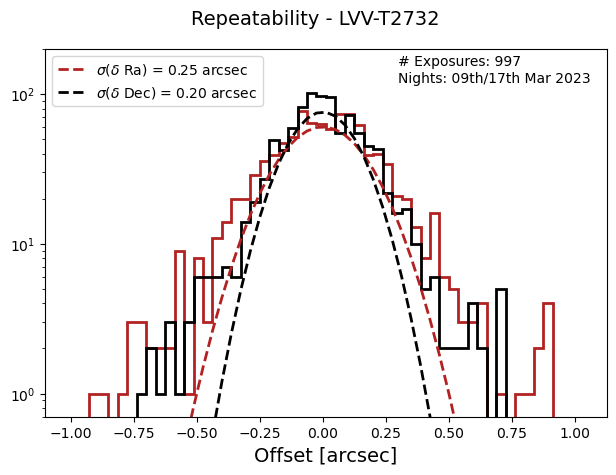

In [19]:
jra = np.nanstd(res_ra)
jdec = np.nanstd(res_dec)

Npoints = np.count_nonzero(~np.isnan(res_ra))
mybins = np.arange(-1.0, 1.05, 0.15/4.)

_ = plt.hist(res_ra, bins=mybins, color='firebrick', histtype='step', lw=2, )
_ = plt.hist(res_dec, bins=mybins, color='k', histtype='step', lw=2)
plot_gaussian(mybins,0,jra, N=Npoints,label='$\sigma(\delta$ Ra) = %.2f arcsec'%jra, color='firebrick', ls='--', lw=2)
plot_gaussian(mybins,0,jdec, N=Npoints,label='$\sigma(\delta$ Dec) = %.2f arcsec'%jdec, color='k', ls='--', lw=2)
plt.text(0.3, 120, '# Exposures: %i \nNights: 09th/17th Mar 2023 '%Npoints)
plt.yscale('log')
plt.ylim(0.7,200)
plt.legend(loc=2)
plt.xlabel('Offset [arcsec]', fontsize=14)
plt.suptitle('Repeatability - LVV-T2732',fontsize=14)
plt.tight_layout()
plt.savefig('figures/radec_residual_histogram.png',dpi=120)

In [43]:
Nout = np.count_nonzero(np.isnan(res_ra)|np.isnan(res_dec))
of_radec = Nout/res_ra.size
print('Outlier Fraction : %.3f'%of_radec)

Outlier Fraction : 0.048


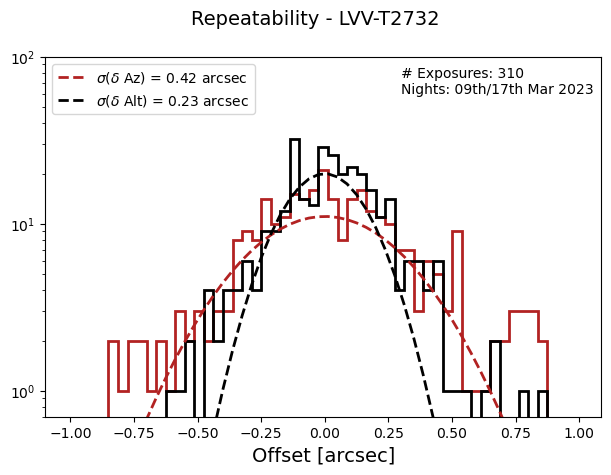

In [39]:
sel =(np.abs(res_az)<1.5)&(np.abs(res_alt)<1.5)

jra = np.nanstd(res_az[sel])
jdec = np.nanstd(res_alt[sel])

Npoints = np.count_nonzero(~np.isnan(res_az[sel]))
mybins = np.arange(-1.0, 1.01, 0.15/4.)

_ = plt.hist(res_az[sel], bins=mybins, color='firebrick', histtype='step', lw=2, )
_ = plt.hist(res_alt[sel], bins=mybins, color='k', histtype='step', lw=2)
plot_gaussian(mybins,0,jra, N=Npoints,label='$\sigma(\delta$ Az) = %.2f arcsec'%jra, color='firebrick', ls='--', lw=2)
plot_gaussian(mybins,0,jdec, N=Npoints,label='$\sigma(\delta$ Alt) = %.2f arcsec'%jdec, color='k', ls='--', lw=2)
plt.text(0.3, 60, '# Exposures: %i \nNights: 09th/17th Mar 2023 '%Npoints)
plt.yscale('log')
plt.ylim(0.7,100)
plt.legend(loc=2)
plt.xlabel('Offset [arcsec]', fontsize=14)
plt.suptitle('Repeatability - LVV-T2732',fontsize=14)
plt.tight_layout()
plt.savefig('figures/azalt_residual_histogram.png',dpi=120)

In [45]:
Nout = np.count_nonzero(np.isnan(res_az)|np.isnan(res_alt)|~sel)
of_azalt = Nout/res_ra.size
print('Outlier Fraction : %.3f'%of_azalt)

Outlier Fraction : 0.698


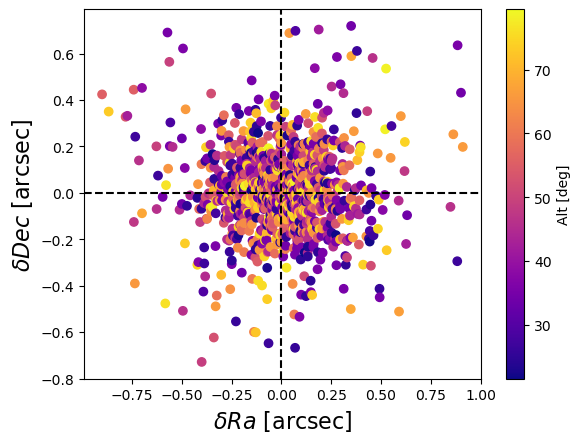

In [11]:
ix = np.argsort(res_ra)
plt.scatter(res_ra[ix], res_dec[ix], c=base_alt[ix],cmap='plasma')
plt.axvline(0,color='k',ls='--')
plt.axhline(0,color='k',ls='--')
# plt.title('Snake %i: %s'%(snake_id,today), fontsize=14)
plt.xlabel(r'$\delta Ra$ [arcsec]',fontsize=16)
plt.ylabel(r'$\delta Dec$ [arcsec]',fontsize=16)
plt.colorbar(label='Alt [deg]')
plt.savefig('figures/residual2d_radec.png',dpi=120)

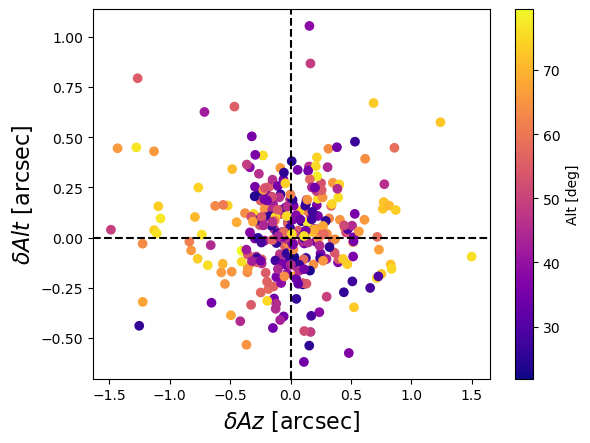

In [27]:
# ix = np.argsort(res_ra)
ix = np.where((np.abs(res_az)<1.5)&(np.abs(res_alt)<1.5))
plt.scatter(res_az[ix], res_alt[ix], c=base_alt[ix], cmap='plasma')
plt.axvline(0,color='k',ls='--')
plt.axhline(0,color='k',ls='--')
# plt.title('Snake %i: %s'%(snake_id,today), fontsize=14)
plt.xlabel(r'$\delta Az$ [arcsec]',fontsize=16)
plt.ylabel(r'$\delta Alt$ [arcsec]',fontsize=16)
plt.colorbar(label='Alt [deg]')
plt.savefig('figures/residual2d_altaz.png',dpi=120)

We cannot trust the Az/Alt residuals. They reflect the pointing model.

In [29]:
sunique, sids, counts = np.unique(snakes, return_index=True, return_counts=True)
keys = [np.where(snakes==gi)[0] for gi in sunique]

stds = []
for ix in keys:
    stds.append([np.nanstd(res_ra[ix]),np.nanstd(res_dec[ix])])
stds = np.array(stds)

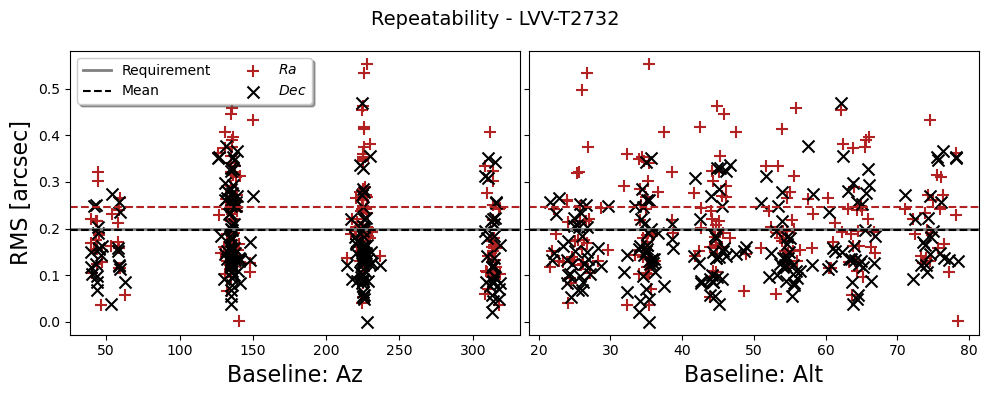

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey='all')

jra = np.nanstd(res_ra)
jdec = np.nanstd(res_dec)

ax1.axhline(0.2, color='gray', lw=2, label='Requirement')
ax2.axhline(0.2, color='gray', lw=2, label='Requirement')

ax2.axhline(jra, c='firebrick', ls='--')
ax2.axhline(jdec, c='k', ls='--')

ax1.axhline(jra, c='firebrick', ls='--')
ax1.axhline(jdec, c='k', ls='--',label='Mean')

ax1.scatter(base_az[sids], stds[:,0], c='firebrick', marker='+', s=75, label=r'$Ra$')
ax2.scatter(base_alt[sids], stds[:,0], c='firebrick', marker='+', s=75)

ax1.scatter(base_az[sids], stds[:,1], c='k', marker='x', s=75, label=r'$Dec$')
ax2.scatter(base_alt[sids], stds[:,1], c='k', marker='x', s=75)

# ax1.set_ylim(0.,1.0)
ax1.legend(loc=2, ncol=2, fancybox=True, shadow=True)
# ax2.legend(loc=1)

ax1.set_ylabel('RMS [arcsec]',fontsize=16)
ax1.set_xlabel('Baseline: Az',fontsize=16)
ax2.set_xlabel('Baseline: Alt',fontsize=16)
fig.suptitle('Repeatability - LVV-T2732',fontsize=14)
fig.tight_layout()
fig.subplots_adjust(wspace=0.02)
plt.savefig('figures/scatter_radec_azalt.png',dpi=120)

In [34]:
sel =(np.abs(res_az)<1.5)&(np.abs(res_alt)<1.5)
sunique, sids, counts = np.unique(snakes, return_index=True, return_counts=True)
keys = [np.where(snakes[sel]==gi)[0] for gi in sunique]

stds = []
for ix in keys:
    stds.append([np.nanstd(res_az[sel][ix]),np.nanstd(res_alt[sel][ix])])
stds = np.array(stds)

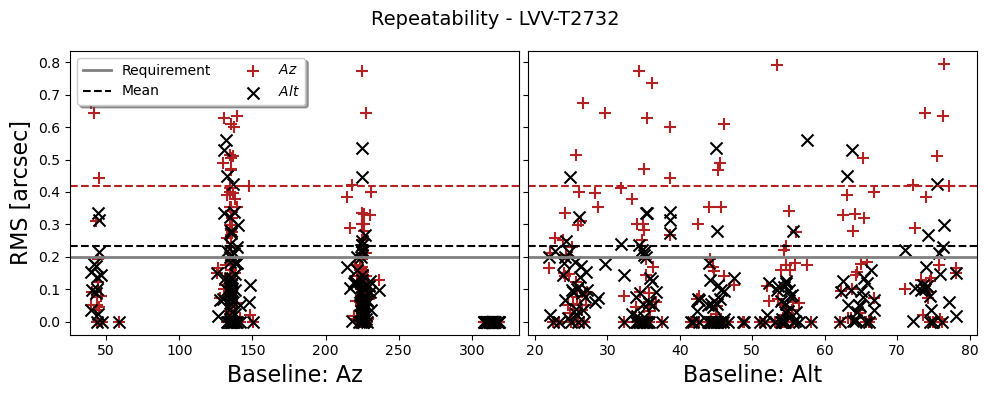

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey='all')

jra = np.nanstd(res_az[sel])
jdec = np.nanstd(res_alt[sel])

ax1.axhline(0.2, color='gray', lw=2, label='Requirement')
ax2.axhline(0.2, color='gray', lw=2, label='Requirement')

ax2.axhline(jra, c='firebrick', ls='--')
ax2.axhline(jdec, c='k', ls='--')

ax1.axhline(jra, c='firebrick', ls='--')
ax1.axhline(jdec, c='k', ls='--',label='Mean')

ax1.scatter(base_az[sids], stds[:,0], c='firebrick', marker='+', s=75, label=r'$Az$')
ax2.scatter(base_alt[sids], stds[:,0], c='firebrick', marker='+', s=75)

ax1.scatter(base_az[sids], stds[:,1], c='k', marker='x', s=75, label=r'$Alt$')
ax2.scatter(base_alt[sids], stds[:,1], c='k', marker='x', s=75)

# ax1.set_ylim(0.,1.0)
ax1.legend(loc=2, ncol=2, fancybox=True, shadow=True)
# ax2.legend(loc=1)

ax1.set_ylabel('RMS [arcsec]',fontsize=16)
ax1.set_xlabel('Baseline: Az',fontsize=16)
ax2.set_xlabel('Baseline: Alt',fontsize=16)
fig.suptitle('Repeatability - LVV-T2732',fontsize=14)
fig.tight_layout()
fig.subplots_adjust(wspace=0.02)
plt.savefig('figures/scatter_azalt_azalt.png',dpi=120)

## Repeat the plots for each night

The two nights dataset have equivalents results. Here I show them separately for the record.

### 9th March

In [46]:
today = '2023-03-09'
data = df1.to_numpy()
res_ra = mask_outliers(data[:,0].astype(float))
res_dec = mask_outliers(data[:,1].astype(float))

res_az = mask_outliers(data[:,2].astype(float))
res_alt = mask_outliers(data[:,3].astype(float))

base_az = data[:,-4].astype(float)
base_alt = data[:,-3].astype(float)

snakes = data[:,-2].astype(int)

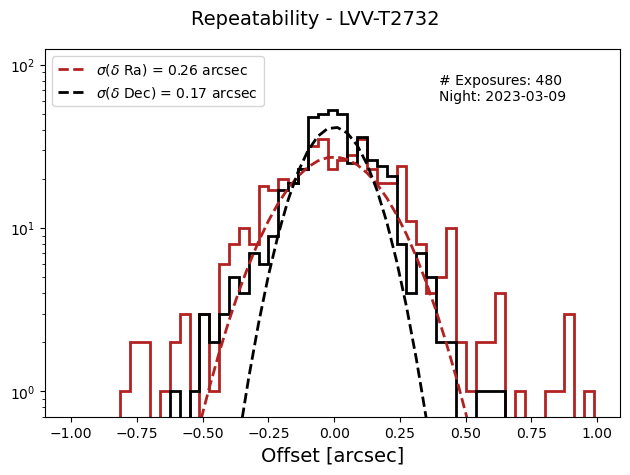

In [47]:
jra = np.nanstd(res_ra)
jdec = np.nanstd(res_dec)

Npoints = res_ra.size
mybins = np.arange(-1.0, 1.01, 0.15/4.)

_ = plt.hist(res_ra, bins=mybins, color='firebrick', histtype='step', lw=2, )
_ = plt.hist(res_dec, bins=mybins, color='k', histtype='step', lw=2)
plot_gaussian(mybins,0,jra, N=Npoints,label='$\sigma(\delta$ Ra) = %.2f arcsec'%jra, color='firebrick', ls='--', lw=2)
plot_gaussian(mybins,0,jdec, N=Npoints,label='$\sigma(\delta$ Dec) = %.2f arcsec'%jdec, color='k', ls='--', lw=2)
plt.text(0.4, 120/2., '# Exposures: %i \nNight: %s '%(Npoints, today))
plt.yscale('log')
plt.ylim(0.7,250/2.)
plt.legend(loc=2)
plt.xlabel('Offset [arcsec]', fontsize=14)
plt.suptitle('Repeatability - LVV-T2732',fontsize=14)
plt.tight_layout()
plt.savefig('figures/radec_residual_histogram_%s.png'%today,dpi=100)

In [48]:
sunique, sids, counts = np.unique(snakes, return_index=True, return_counts=True)
keys = [np.where(snakes==gi)[0] for gi in sunique]

stds = []
for ix in keys:
    stds.append([np.std(res_ra[ix]),np.std(res_dec[ix])])
stds = np.array(stds)

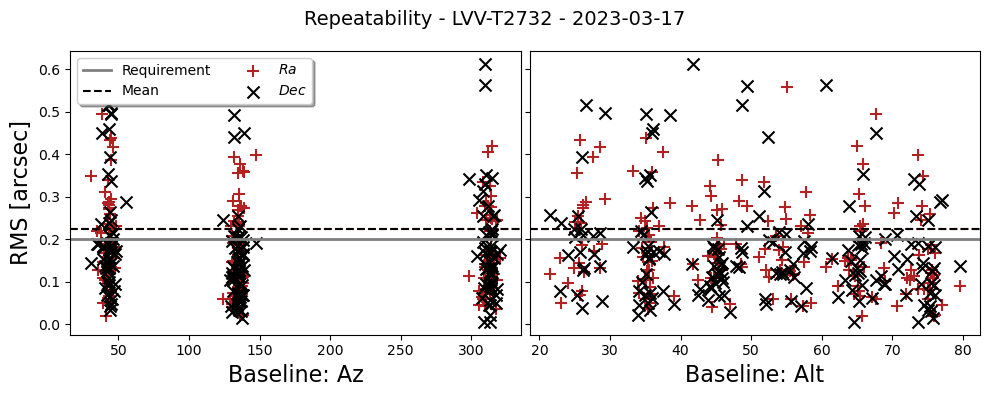

In [60]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey='all')


ax1.axhline(0.2, color='gray', lw=2, label='Requirement')
ax2.axhline(0.2, color='gray', lw=2, label='Requirement')

ax2.axhline(jra, c='firebrick', ls='--')
ax2.axhline(jdec, c='k', ls='--')

ax1.axhline(jra, c='firebrick', ls='--')
ax1.axhline(jdec, c='k', ls='--',label='Mean')

ax1.scatter(base_az[sids], stds[:,0], c='firebrick', marker='+', s=75, label=r'$Ra$')
ax2.scatter(base_alt[sids], stds[:,0], c='firebrick', marker='+', s=75)

ax1.scatter(base_az[sids], stds[:,1], c='k', marker='x', s=75, label=r'$Dec$')
ax2.scatter(base_alt[sids], stds[:,1], c='k', marker='x', s=75)

# ax1.set_ylim(0.,1.0)
ax1.legend(loc=2, ncol=2, fancybox=True, shadow=True)
# ax2.legend(loc=1)

ax1.set_ylabel('RMS [arcsec]',fontsize=16)
ax1.set_xlabel('Baseline: Az',fontsize=16)
ax2.set_xlabel('Baseline: Alt',fontsize=16)
fig.suptitle('Repeatability - LVV-T2732 - %s'%today,fontsize=14)
fig.tight_layout()
fig.subplots_adjust(wspace=0.02)
plt.savefig('figures/scatter_radec_azalt_%s.png'%today,dpi=100)

### 17th March

In [56]:
today = '2023-03-17'
data = df2.to_numpy()
res_ra = mask_outliers(data[:,0].astype(float))
res_dec = mask_outliers(data[:,1].astype(float))

res_az = mask_outliers(data[:,2].astype(float))
res_alt = mask_outliers(data[:,3].astype(float))

base_az = data[:,-4].astype(float)
base_alt = data[:,-3].astype(float)

snakes = data[:,-2].astype(int)

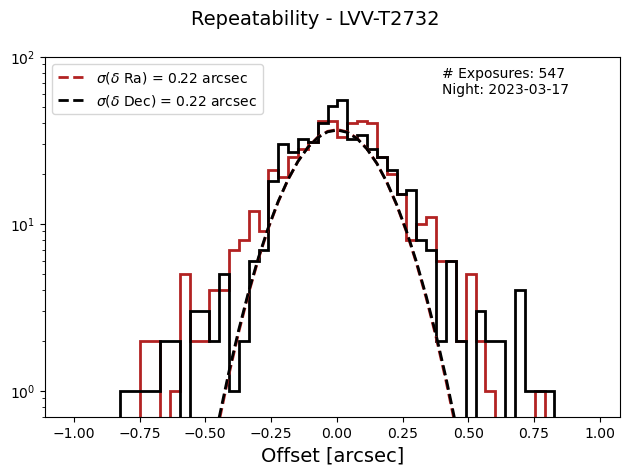

In [57]:
jra = np.nanstd(res_ra)
jdec = np.nanstd(res_dec)

Npoints = res_ra.size
mybins = np.arange(-1.01, 1.01, 0.15/4.)

_ = plt.hist(res_ra, bins=mybins, color='firebrick', histtype='step', lw=2, )
_ = plt.hist(res_dec, bins=mybins, color='k', histtype='step', lw=2)
plot_gaussian(mybins,0,jra, N=Npoints,label='$\sigma(\delta$ Ra) = %.2f arcsec'%jra, color='firebrick', ls='--', lw=2)
plot_gaussian(mybins,0,jdec, N=Npoints,label='$\sigma(\delta$ Dec) = %.2f arcsec'%jdec, color='k', ls='--', lw=2)
plt.text(0.4, 120/2., '# Exposures: %i \nNight: %s '%(Npoints, today))
plt.yscale('log')
plt.ylim(0.7,200/2.)
plt.legend(loc=2)
plt.xlabel('Offset [arcsec]', fontsize=14)
plt.suptitle('Repeatability - LVV-T2732',fontsize=14)
plt.tight_layout()
plt.savefig('figures/radec_residual_histogram_%s.png'%today,dpi=100)

In [58]:
sunique, sids, counts = np.unique(snakes, return_index=True, return_counts=True)
keys = [np.where(snakes==gi)[0] for gi in sunique]

stds = []
for ix in keys:
    stds.append([np.std(res_ra[ix]),np.std(res_dec[ix])])
stds = np.array(stds)

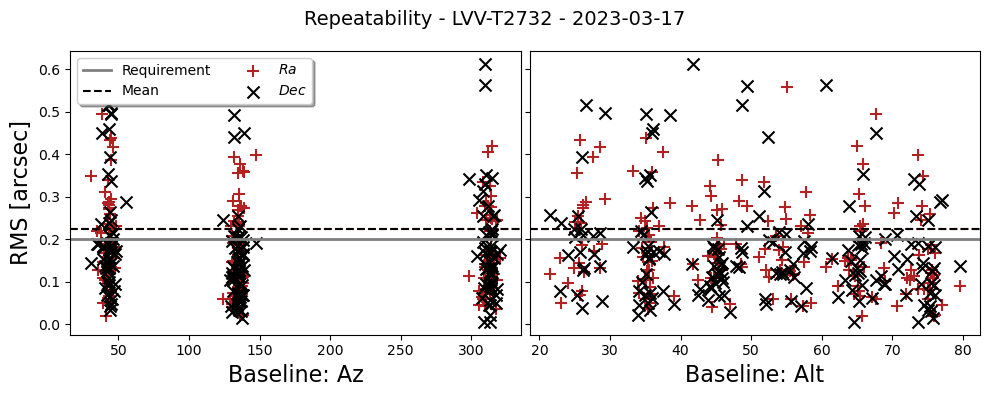

In [61]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey='all')


ax1.axhline(0.2, color='gray', lw=2, label='Requirement')
ax2.axhline(0.2, color='gray', lw=2, label='Requirement')

ax2.axhline(jra, c='firebrick', ls='--')
ax2.axhline(jdec, c='k', ls='--')

ax1.axhline(jra, c='firebrick', ls='--')
ax1.axhline(jdec, c='k', ls='--',label='Mean')

ax1.scatter(base_az[sids], stds[:,0], c='firebrick', marker='+', s=75, label=r'$Ra$')
ax2.scatter(base_alt[sids], stds[:,0], c='firebrick', marker='+', s=75)

ax1.scatter(base_az[sids], stds[:,1], c='k', marker='x', s=75, label=r'$Dec$')
ax2.scatter(base_alt[sids], stds[:,1], c='k', marker='x', s=75)

# ax1.set_ylim(0.,1.0)
ax1.legend(loc=2, ncol=2, fancybox=True, shadow=True)
# ax2.legend(loc=1)

ax1.set_ylabel('RMS [arcsec]',fontsize=16)
ax1.set_xlabel('Baseline: Az',fontsize=16)
ax2.set_xlabel('Baseline: Alt',fontsize=16)
fig.suptitle('Repeatability - LVV-T2732 - %s'%today,fontsize=14)
fig.tight_layout()
fig.subplots_adjust(wspace=0.02)
plt.savefig('figures/scatter_radec_azalt_%s.png'%today,dpi=100)